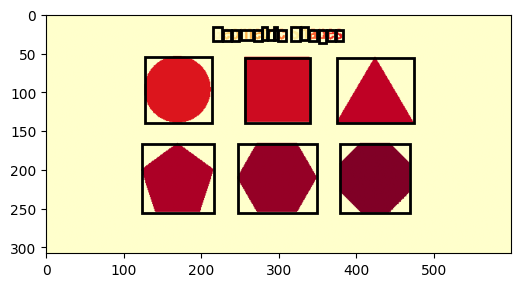

In [2]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu(a)
# pixels with intensity greater than theshould are kept
b = a > thres
# labelling is performed on b
c = label(b)
cl = Image.fromarray(c)
iio.imsave('label_output.png', cl)
# on the labelled image c, regionprops is performed
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)
# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')
for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr
    # Rectangular boxes with origin at (lr,lc) are drawn
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)
    ax.add_patch(rect)
plt.show()

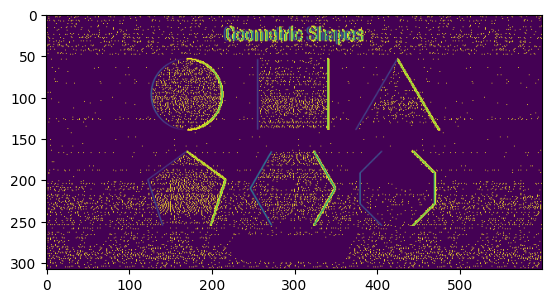

In [6]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

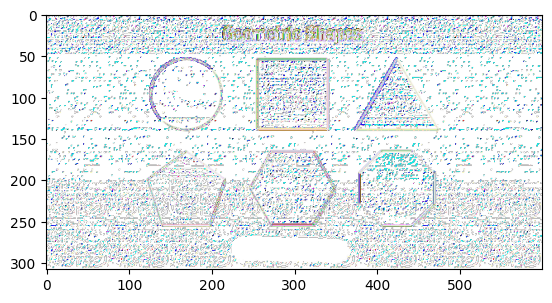

In [8]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg =abs(a) + abs(b)

plt.imshow(bmg)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.800000000000004..255.0].


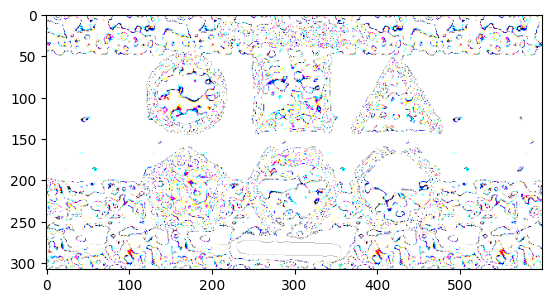

In [9]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)
    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC**2
    return R

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()

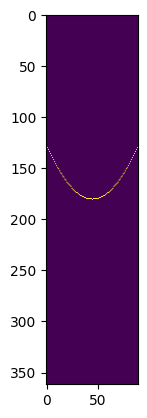

In [10]:
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))
    ho = np.zeros((R, 90), float)  # Hough space
    w = data + 0
    ok = 1
    theta = np.arange(90) / 180.0 * np.pi
    tp = np.arange(90).astype(float)
    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            v, h = divmod(w.argmax(), H)
            y = V - v
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[v, h] = 0
    return ho

data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()

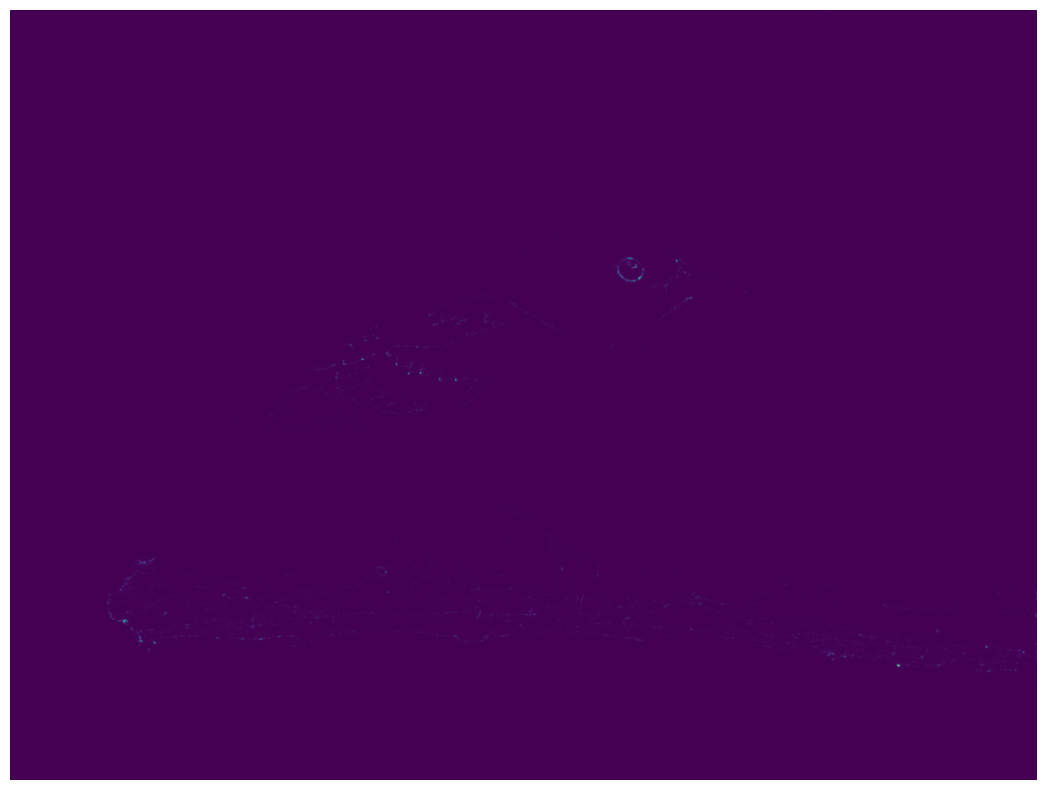

In [11]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.feature import corner_harris
from skimage.color import rgb2gray

data = iio.imread('bird.png')
image_gray = rgb2gray(data)
coordinate = corner_harris(image_gray, k=0.001)

plt.figure(figsize=(20, 10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HuuThang\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB 435.7 kB/s eta 0:00:25
   ---------------------------------------- 0.0/10.7 MB 435.7 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.7 MB 328.2 kB/s eta 0:00:33
   ---------------------------------------- 0.1/10.7 MB 403.5 kB/s eta 0:00:27
   ---------------------------------------- 0.1/10.7 MB 347.8 kB/s eta 0:00:31
    --------------------------------------- 0.2/10.7 MB 459.5 kB/s eta 0:00:23
    --------------------------------------- 0.2/10.7 MB 570.5 kB/s eta 0:00:19
    --------------------------------------- 0.2/10.7 MB 554.9 kB/s eta 0:00:19
    --------------------------------------- 0.3/10.7 MB 565.1 kB/s eta 0:00:19
   - -------------------------------------- 0.3/10.7 MB 589.5 kB/s eta 0:00:18
   - -------------------------------------- 0.3/10.7 MB 596.5 kB/s eta

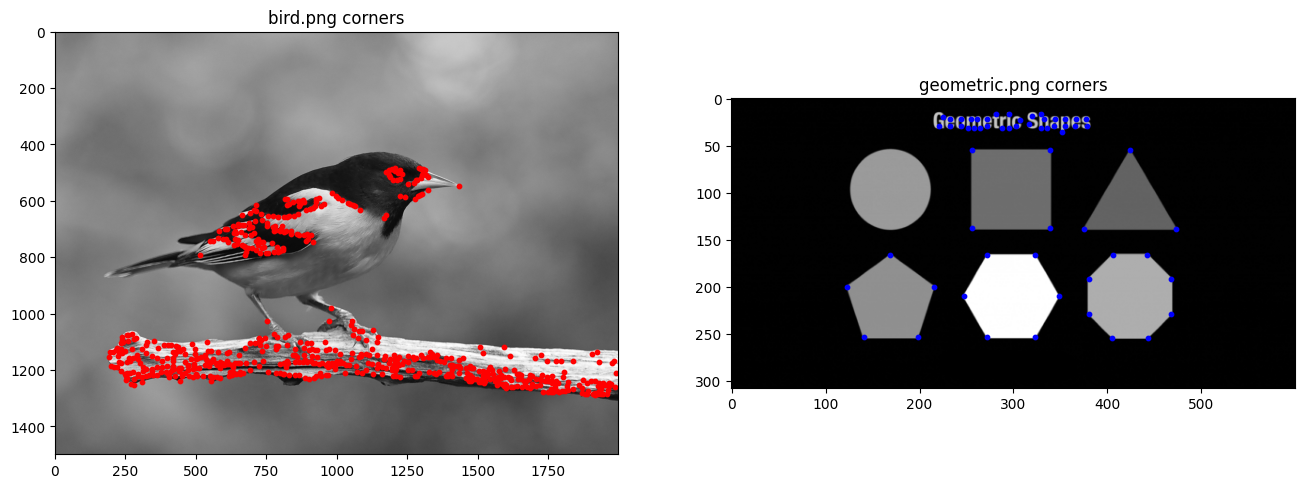

Top 10 matches (distance):
bird.png corner [582 996] <-> geometric.png corner [166 442], distance: 3.74
bird.png corner [633 707] <-> geometric.png corner [166 442], distance: 3.75
bird.png corner [1120 1593] <-> geometric.png corner [166 169], distance: 3.97
bird.png corner [689 650] <-> geometric.png corner [138 256], distance: 3.99
bird.png corner [ 609 1040] <-> geometric.png corner [166 442], distance: 4.36
bird.png corner [1198  994] <-> geometric.png corner [166 442], distance: 4.67
bird.png corner [682 649] <-> geometric.png corner [ 55 256], distance: 4.76
bird.png corner [1155 1345] <-> geometric.png corner [254 198], distance: 4.78
bird.png corner [617 943] <-> geometric.png corner [166 406], distance: 4.80
bird.png corner [ 518 1300] <-> geometric.png corner [166 169], distance: 4.82


In [14]:
%pip install scikit-learn

import numpy as np
import imageio.v2 as iio
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
from skimage.util import img_as_float
import matplotlib.pyplot as plt

def extract_patches(image, coords, patch_size=11):
    half = patch_size // 2
    patches = []
    valid_coords = []
    for y, x in coords:
        if y-half >= 0 and y+half < image.shape[0] and x-half >= 0 and x+half < image.shape[1]:
            patch = image[y-half:y+half+1, x-half:x+half+1]
            patches.append(patch.flatten())
            valid_coords.append((y, x))
    return np.array(patches), np.array(valid_coords)

def match_descriptors(desc1, desc2):
    from sklearn.metrics.pairwise import euclidean_distances
    dists = euclidean_distances(desc1, desc2)
    idx1 = np.arange(dists.shape[0])
    idx2 = np.argmin(dists, axis=1)
    return idx1, idx2, dists[idx1, idx2]

# Load and preprocess images
img1_rgba = iio.imread('bird.png')
img2_rgba = iio.imread('geometric.png')

# Convert RGBA to RGB if needed
if img1_rgba.shape[-1] == 4:
    img1_rgb = img1_rgba[..., :3]
else:
    img1_rgb = img1_rgba
if img2_rgba.shape[-1] == 4:
    img2_rgb = img2_rgba[..., :3]
else:
    img2_rgb = img2_rgba

img1 = img_as_float(rgb2gray(img1_rgb))
img2 = img_as_float(rgb2gray(img2_rgb))

# Detect Harris corners
corners1 = corner_peaks(corner_harris(img1, k=0.04), min_distance=5, threshold_rel=0.01)
corners2 = corner_peaks(corner_harris(img2, k=0.04), min_distance=5, threshold_rel=0.01)

# Extract patches around corners
patch_size = 11
desc1, coords1 = extract_patches(img1, corners1, patch_size)
desc2, coords2 = extract_patches(img2, corners2, patch_size)

# Normalize descriptors
desc1 = (desc1 - np.mean(desc1, axis=1, keepdims=True)) / (np.std(desc1, axis=1, keepdims=True) + 1e-8)
desc2 = (desc2 - np.mean(desc2, axis=1, keepdims=True)) / (np.std(desc2, axis=1, keepdims=True) + 1e-8)

# Match descriptors
idx1, idx2, dists = match_descriptors(desc1, desc2)

# Show matches
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(img1, cmap='gray')
axes[0].scatter(coords1[:,1], coords1[:,0], s=10, c='r')
axes[0].set_title('bird.png corners')
axes[1].imshow(img2, cmap='gray')
axes[1].scatter(coords2[:,1], coords2[:,0], s=10, c='b')
axes[1].set_title('geometric.png corners')
plt.show()

# Show some matched pairs
num_matches = 10
print("Top {} matches (distance):".format(num_matches))
for i in np.argsort(dists)[:num_matches]:
    print(f"bird.png corner {coords1[i]} <-> geometric.png corner {coords2[idx2[i]]}, distance: {dists[i]:.2f}")